<a href="https://colab.research.google.com/github/nidjosep/student-feedback-analysis/blob/master/Actionable_Insights_from_Student_Feedback_Sentiment_Analysis_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actionable Insights from Student Feedback: A Sentiment Analysis Approach**

In the realm of education, student feedback is an invaluable resource for enhancing teaching methodologies and course structures. However, the traditional approach of relying on numerical ratings often fails to capture the nuanced sentiments and specific concerns of students. This project aims to revolutionize the way educators interpret and utilize student feedback by employing a sophisticated sentiment analysis approach.

Our objective is to transform raw, textual student feedback into actionable insights, enabling educators to make informed decisions that align closely with student needs and preferences. The project involves three key components:

1.   **Rating-Based Classification:** We begin by classifying student feedback into traditional rating categories (1-5). This provides a baseline understanding of student satisfaction and sets the stage for a deeper analysis.

2.   **Nuanced Sentiment Analysis:** Moving beyond mere numerical ratings, we delve into the underlying sentiments of the feedback. Whether a student feels 'Frustrated', 'Depressed', or finds the course 'Boring', this model aims to identify and categorize these sentiments. This step is crucial as it helps in prioritizing issues based on their emotional impact, ensuring that more critical concerns like student mental well-being are addressed promptly.

3.   **Aspect-Based Sentiment Analysis (ABSA):** The final and most intricate layer of our analysis focuses on specific aspects of the educational experience, such as 'Teaching Experience' and 'Lab Experience'. By dissecting feedback into these aspects and analyzing the associated sentiments, we provide educators with a detailed, aspect-wise breakdown of student opinions. This granular insight allows for targeted improvements in specific areas of the course.


Utilizing a dataset of student feedback from Coursera, coupled with advanced machine learning models, this project sets out to automate the process of feedback analysis. This automation not only scales the feedback analysis process but also ensures a rapid and nuanced understanding of student sentiments. The anticipated outcome is a more effective, responsive, and student-centric educational strategy, ultimately fostering a supportive and conducive learning environment.



Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/5
1338/1338 [==============================] - 79s 55ms/step - loss: 0.7294 - accuracy: 0.7515 - val_loss: 0.6534 - val_accuracy: 0.7605 - lr: 1.0000e-04
Epoch 2/5
1338/1338 [==============================] - 53s 40ms/step - loss: 0.6293 - accuracy: 0.7649 - val_loss: 0.6289 - val_accuracy: 0.7625 - lr: 1.0000e-04
Epoch 3/5
1338/1338 [==============================] - 52s 39ms/step - loss: 0.6058 - accuracy: 0.7699 - val_loss: 0.6228 - val_accuracy: 0.7634 - lr: 1.0000e-04
Epoch 4/5
1338/1338 [==============================] - 52s 39ms/step - loss: 0.5848 - accuracy: 0.7788 - val_loss: 0.6147 - val_accuracy: 0.7728 - lr: 1.0000e-04
Epoch 5/5
1338/1338 [==============================] - 51s 38ms/step - loss: 0.5614 - accuracy: 0.7881 - val_loss: 0.6091 - val_accuracy: 0.7704 - lr: 1.0000e-04


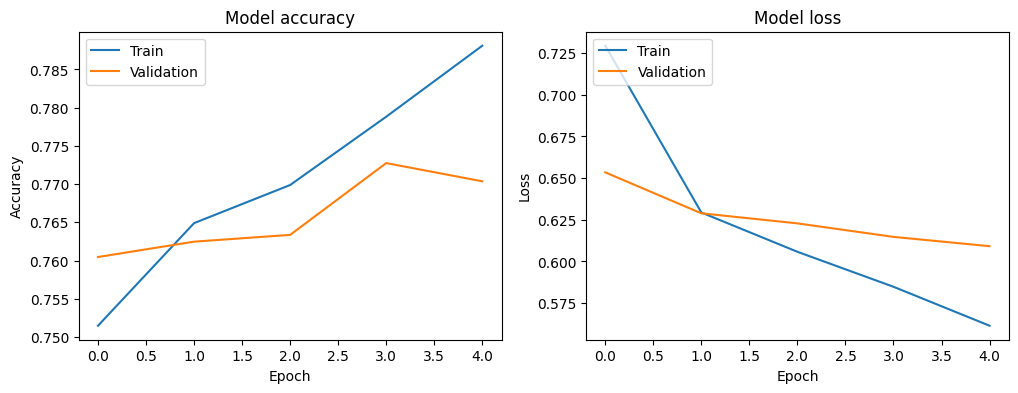

669/669 [==============================] - 8s 11ms/step


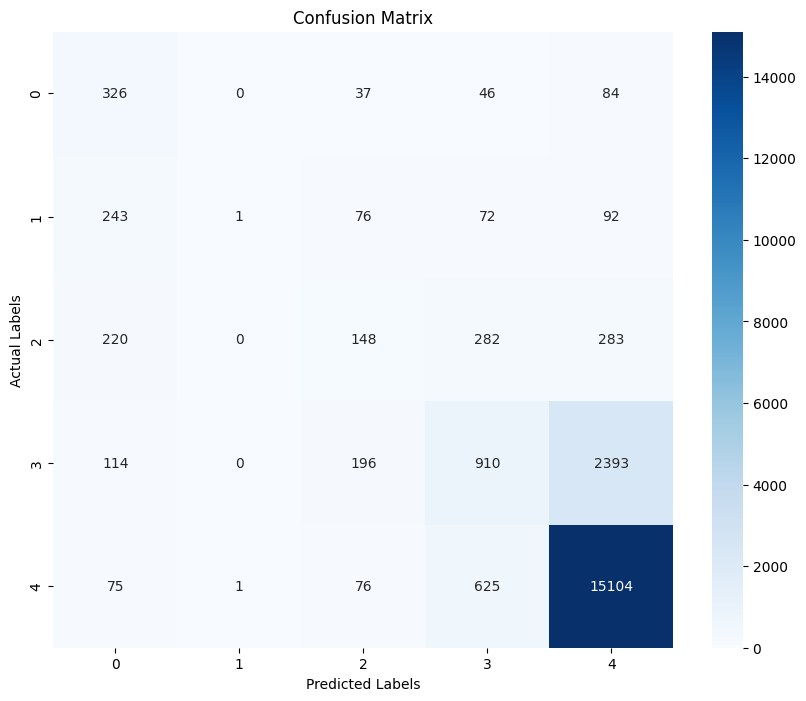

              precision    recall  f1-score   support

           0       0.33      0.66      0.44       493
           1       0.50      0.00      0.00       484
           2       0.28      0.16      0.20       933
           3       0.47      0.25      0.33      3613
           4       0.84      0.95      0.89     15881

    accuracy                           0.77     21404
   macro avg       0.48      0.40      0.37     21404
weighted avg       0.73      0.77      0.74     21404



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import string
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MCSC/TME_6015/Project/reviews.csv')

# Download and prepare stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Initialize Porter Stemmer
ps = PorterStemmer()

# Function to remove stopwords and perform stemming
def process_text(text):
    return ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])

# Apply the function to the DataFrame
df['Review'] = df['Review'].apply(process_text)


# puncutation removal
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the DataFrame
df['Review'] = df['Review'].apply(remove_punctuation)

# Split the data into training and testing sets
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    df['Review'], df['Label'] - 1, test_size=0.2, random_state=42)

# Convert labels to a numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Tokenization and Padding
# Adjust num_words and maxlen based on EDA
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(train_reviews)
X_train_seq = tokenizer.texts_to_sequences(train_reviews)
X_test_seq = tokenizer.texts_to_sequences(test_reviews)
X_train_pad = pad_sequences(X_train_seq, maxlen=200)  # Adjust maxlen as needed
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Building the LSTM model
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))

model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model with callbacks
history = model.fit(X_train_pad, train_labels, batch_size=64, epochs=5,  # Increased epochs
                    validation_data=(X_test_pad, test_labels),
                    callbacks=[early_stopping, lr_scheduler])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
model.evaluate(X_test_pad, test_labels)

# Predict classes
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Print the classification report
print(classification_report(test_labels, y_pred_classes))